## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
*  **Apply a perspective transform to rectify binary image ("birds-eye view").**
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---
## Apply a perspective transform to rectify binary image ("birds-eye view")

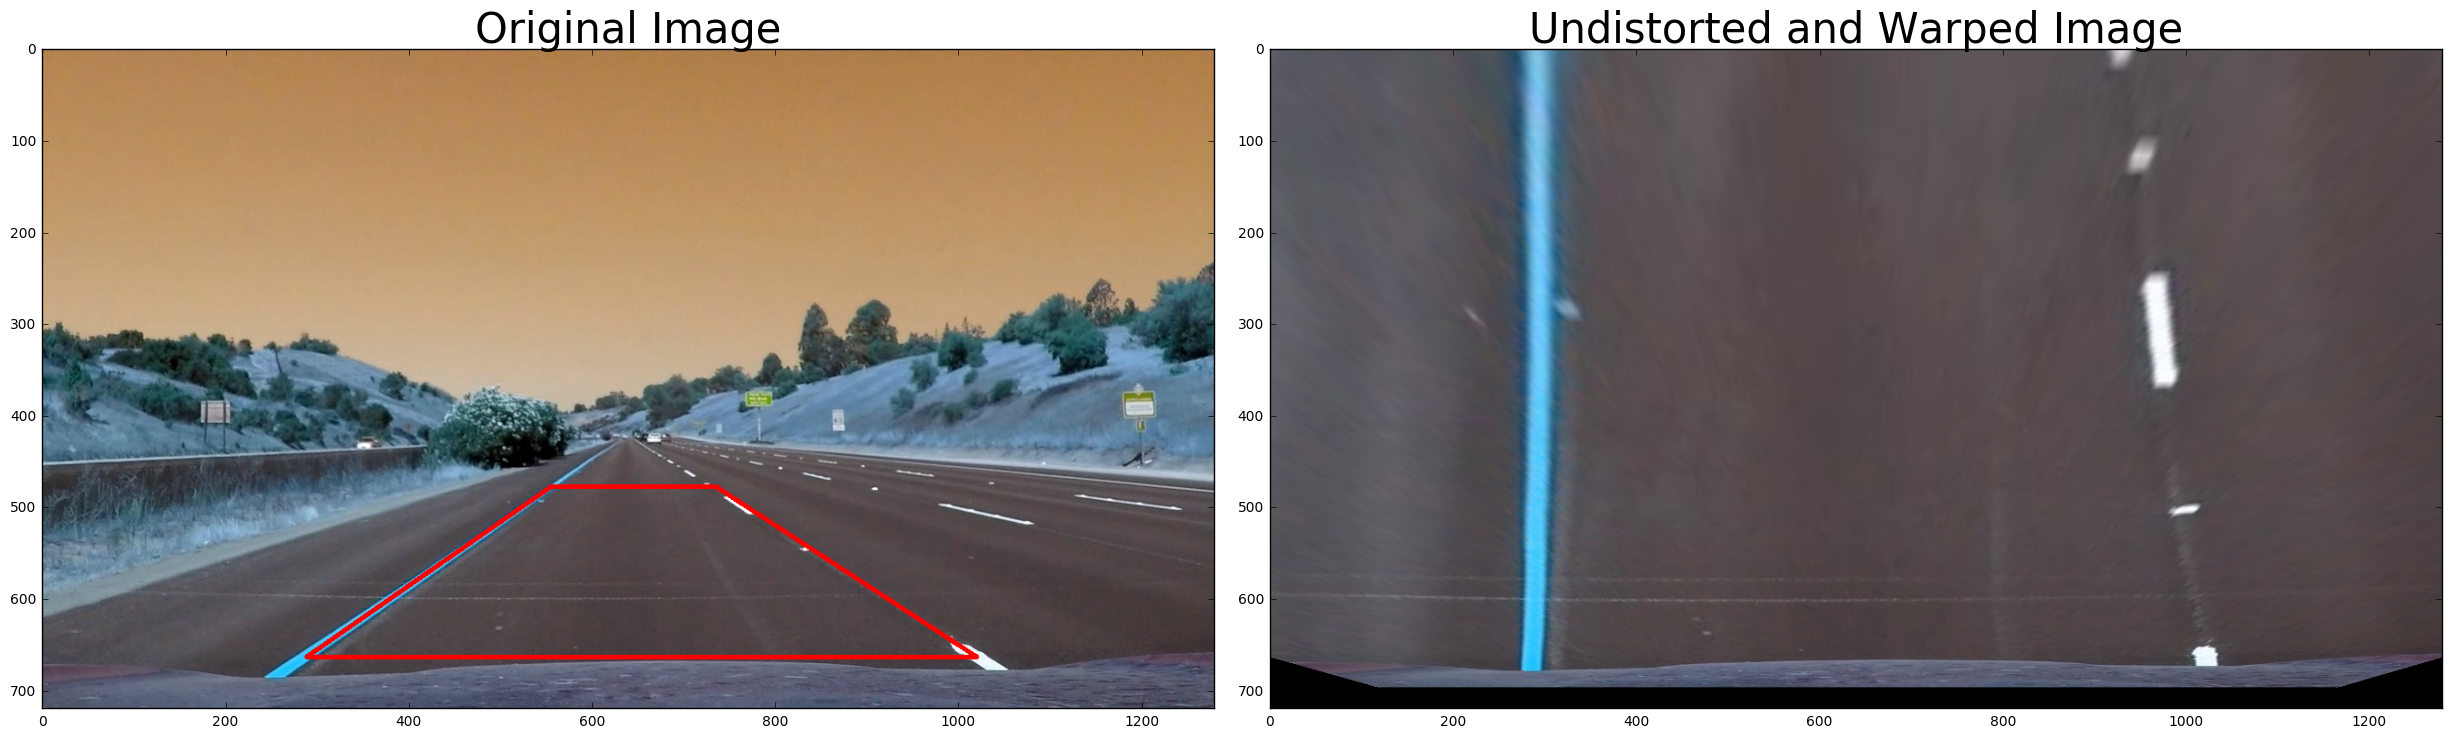

In [4]:
import pickle
import numpy as np
import cv2
import glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

# Read in the saved camera matrix and distortion coefficients
# These are the arrays you calculated using cv2.calibrateCamera()
dist_pickle = pickle.load( open( "pickle_data/camera_cal.p", "rb" ) )
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]

# Read in an image
img = cv2.imread('test_images/straight_lines1.jpg')
nx = 9 # the number of inside corners in x
ny = 6 # the number of inside corners in y

# Undistort and apply perspective the image
def corners_unwarp(img, nx, ny, mtx, dist):
    
    # Undistort using mtx and dist
    undist = cv2.undistort(img, mtx, dist, None, mtx)    
    # Convert to grayscale
    gray = cv2.cvtColor(undist,cv2.COLOR_BGR2GRAY)    
    # Grab the image shape
    img_size = (gray.shape[1], gray.shape[0])
    
    # Source points
    src = np.float32(
        [[288, 664],
         [1020, 664],
         [555, 478],
         [735, 478]]
    )

    # Destination points    
    dst = np.float32(
        [[288, 664],
         [1020, 664],
         [288, 150],
         [975, 150]]
    )

    # Get the transform matrix
    M = cv2.getPerspectiveTransform(src, dst)
    # Warp your image to a top-down view
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
        
    return warped, M, src

top_down, perspective_M, src = corners_unwarp(img, nx, ny, mtx, dist)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

# Draw polygon
pts = np.array([src[0], src[2], src[3], src[1]], np.int32)
pts = pts.reshape((-1,1,2))
cv2.polylines(img,[pts],True,(255,0,0),4)

# Original image (with polygon overlapped)
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.set_title('Original Image', fontsize=30)

# Warped image
ax2.imshow(cv2.cvtColor(top_down, cv2.COLOR_BGR2RGB))
ax2.set_title('Undistorted and Warped Image', fontsize=30)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
